In [51]:
import tensorflow

from tensorflow import keras
import pyforest

In [52]:
fashion = keras.datasets.fashion_mnist

In [53]:
(features_train, labels_train), (features_test, labels_test) = fashion.load_data()

In [54]:
features_train.shape

(60000, 28, 28)

In [55]:
label_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

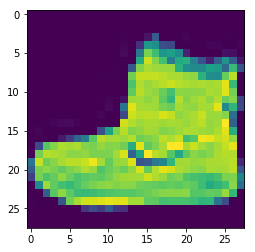

In [56]:
plt.figure()
plt.imshow(features_train[0])
plt.show()

In [57]:
#normalize
features_train = features_train / 255.0
features_test = features_test / 255.0

In [58]:
labels_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

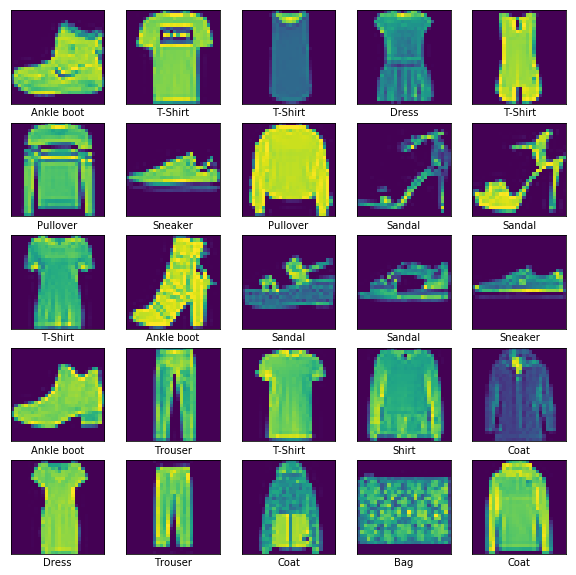

In [59]:
plt.figure(figsize=(10,10))
for imgs in range(25):
    plt.subplot(5,5,imgs+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features_train[imgs])
    plt.xlabel(label_names[labels_train[imgs]])
plt.show()

In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(features_train, labels_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.4948 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3722 - accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.3347 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3097 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2924 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.2644 - accuracy: 0.9021
Epoch 8/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2560 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2465 - accuracy: 0.9

In [76]:
#test_loss, test_accuracy = model.evaluate(features_train, labels_train)

In [72]:
model.get_weights()

[array([[ 0.07160284,  0.01800383, -0.07750358, ...,  0.0616013 ,
         -0.0281291 ,  0.12253951],
        [ 0.03128638,  0.027415  ,  0.08025075, ..., -0.03713549,
          0.20927103,  0.09950452],
        [-0.22701767, -0.1449967 , -0.06153162, ..., -0.07838256,
          0.17337358, -0.27504137],
        ...,
        [ 0.33687022,  0.08292057,  0.16163091, ...,  0.05973052,
          0.16661628, -0.36348486],
        [ 0.73012155, -0.15961914,  0.17860463, ..., -0.0598217 ,
          0.2933589 , -0.50256115],
        [ 0.15221557, -0.13609296,  0.11847292, ..., -0.03310835,
         -0.2429115 , -0.19552767]], dtype=float32),
 array([ 0.15571219,  0.37122622,  0.31382895,  0.31356078,  0.25612774,
         0.32334554, -0.04217542,  0.56440866, -0.01642982, -0.16860913,
        -0.12462771,  0.64389557,  0.52152777,  0.2617305 ,  0.42730123,
         0.47222552,  0.59802496,  0.44593763, -0.08279783,  0.6157167 ,
        -0.17677309,  0.6991758 , -0.11305873, -0.24328554,  0.355

In [79]:
model.predict(features_test)[0]

array([6.2912164e-07, 2.1473994e-09, 5.0097690e-08, 3.5720993e-09,
       3.4670939e-09, 4.6051785e-04, 2.6307491e-06, 3.7499826e-02,
       8.5565270e-09, 9.6203637e-01], dtype=float32)

In [80]:
np.argmax(prediction[0])

9

In [82]:
label_names[np.argmax(model.predict(features_test)[0])] 

'Ankle boot'

Text(0.5, 0, 'Trouser')

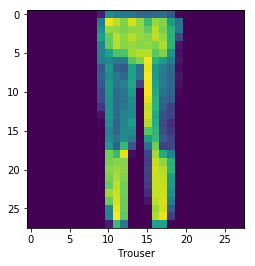

In [68]:
plt.imshow(features_test[3])
plt.xlabel(label_names[labels_test[3]])

In [69]:
#model.save('model.h5')